In [32]:
import pandas as pd 
import matplotlib.pyplot as plt



In [33]:
df=pd.read_csv(r"C:\Users\user\OneDrive\Desktop\house_prediction\data\raw_listings-1.csv")
df.head()

,listing_id,location,property_type,bedrooms,bathrooms,size_sqm,amenities,price_kes,listing_date
0,NB0001,Ruaka,Penthouse,5,4,234.0,"CCTV,Servant Quarter",20876564.0,2025-02-15
1,NB0002,South B,Penthouse,2,2,122.6,"Servant Quarter,Gym,Swimming Pool,Elevator",11431043.0,2025-09-16
2,NB0003,Kasarani,Penthouse,3,4,52.7,"CCTV,Swimming Pool,Balcony",9893180.0,2026-01-13
3,NB0004,Ruaka,Bungalow,3,3,99.6,"Gym,Servant Quarter,Elevator,Security,Garden",15415773.0,2025-10-07
4,NB0005,Kileleshwa,Bungalow,3,2,50.1,"Garden,Servant Quarter,Elevator",13150006.0,2026-02-04


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing_id     500 non-null    object 
 1   location       500 non-null    object 
 2   property_type  500 non-null    object 
 3   bedrooms       500 non-null    int64  
 4   bathrooms      500 non-null    int64  
 5   size_sqm       500 non-null    float64
 6   amenities      500 non-null    object 
 7   price_kes      500 non-null    float64
 8   listing_date   500 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB


In [35]:
# drop a column
df.drop(columns=["listing_id"],inplace=True)

In [36]:
df.head()

,location,property_type,bedrooms,bathrooms,size_sqm,amenities,price_kes,listing_date
0,Ruaka,Penthouse,5,4,234.0,"CCTV,Servant Quarter",20876564.0,2025-02-15
1,South B,Penthouse,2,2,122.6,"Servant Quarter,Gym,Swimming Pool,Elevator",11431043.0,2025-09-16
2,Kasarani,Penthouse,3,4,52.7,"CCTV,Swimming Pool,Balcony",9893180.0,2026-01-13
3,Ruaka,Bungalow,3,3,99.6,"Gym,Servant Quarter,Elevator,Security,Garden",15415773.0,2025-10-07
4,Kileleshwa,Bungalow,3,2,50.1,"Garden,Servant Quarter,Elevator",13150006.0,2026-02-04


In [37]:
# find duplicated rows
df.duplicated().sum()

np.int64(0)

In [38]:
# find missing values
df.isnull().sum()

location         0
property_type    0
bedrooms         0
bathrooms        0
size_sqm         0
amenities        0
price_kes        0
listing_date     0
dtype: int64

In [39]:
# list the location column
df["location"].head(10)

0         Ruaka
1       South B
2      Kasarani
3         Ruaka
4    Kileleshwa
5     Lavington
6         Karen
7       South C
8      Embakasi
9       South B
Name: location, dtype: object

In [40]:
df["size_sqm"].head(10)

0    234.0
1    122.6
2     52.7
3     99.6
4     50.1
5    386.5
6    225.0
7    202.9
8    175.0
9    114.6
Name: size_sqm, dtype: float64

In [41]:
# change size_sqm to size_sqft
df["size_sqft"]=df["size_sqm"]*10.7639
df.head()


,location,property_type,bedrooms,bathrooms,size_sqm,amenities,price_kes,listing_date,size_sqft
0,Ruaka,Penthouse,5,4,234.0,"CCTV,Servant Quarter",20876564.0,2025-02-15,2518.75260
1,South B,Penthouse,2,2,122.6,"Servant Quarter,Gym,Swimming Pool,Elevator",11431043.0,2025-09-16,1319.65414
2,Kasarani,Penthouse,3,4,52.7,"CCTV,Swimming Pool,Balcony",9893180.0,2026-01-13,567.25753
3,Ruaka,Bungalow,3,3,99.6,"Gym,Servant Quarter,Elevator,Security,Garden",15415773.0,2025-10-07,1072.08444
4,Kileleshwa,Bungalow,3,2,50.1,"Garden,Servant Quarter,Elevator",13150006.0,2026-02-04,539.27139


In [42]:
# create a new column price_per_sqft
df["price_per_sqft"]=df["price_kes"]/df["size_sqft"]
df.head()


,location,property_type,bedrooms,bathrooms,size_sqm,amenities,price_kes,listing_date,size_sqft,price_per_sqft
0,Ruaka,Penthouse,5,4,234.0,"CCTV,Servant Quarter",20876564.0,2025-02-15,2518.75260,8288.453578
1,South B,Penthouse,2,2,122.6,"Servant Quarter,Gym,Swimming Pool,Elevator",11431043.0,2025-09-16,1319.65414,8662.150675
2,Kasarani,Penthouse,3,4,52.7,"CCTV,Swimming Pool,Balcony",9893180.0,2026-01-13,567.25753,17440.367870
3,Ruaka,Bungalow,3,3,99.6,"Gym,Servant Quarter,Elevator,Security,Garden",15415773.0,2025-10-07,1072.08444,14379.252627
4,Kileleshwa,Bungalow,3,2,50.1,"Garden,Servant Quarter,Elevator",13150006.0,2026-02-04,539.27139,24384.764784


In [43]:
# Fill missing values and clean text
df["amenities"] = df["amenities"].fillna("").str.lower().str.strip()

# One-hot encode amenities
amenities_dummies = df["amenities"].str.get_dummies(sep=",")

# Combine with original dataframe
df = pd.concat([df, amenities_dummies], axis=1)

In [44]:
df.head()

,location,property_type,bedrooms,bathrooms,size_sqm,amenities,price_kes,listing_date,size_sqft,price_per_sqft,backup generator,balcony,cctv,elevator,garden,gym,parking,security,servant quarter,swimming pool
0,Ruaka,Penthouse,5,4,234.0,"cctv,servant quarter",20876564.0,2025-02-15,2518.75260,8288.453578,0,0,1,0,0,0,0,0,1,0
1,South B,Penthouse,2,2,122.6,"servant quarter,gym,swimming pool,elevator",11431043.0,2025-09-16,1319.65414,8662.150675,0,0,0,1,0,1,0,0,1,1
2,Kasarani,Penthouse,3,4,52.7,"cctv,swimming pool,balcony",9893180.0,2026-01-13,567.25753,17440.367870,0,1,1,0,0,0,0,0,0,1
3,Ruaka,Bungalow,3,3,99.6,"gym,servant quarter,elevator,security,garden",15415773.0,2025-10-07,1072.08444,14379.252627,0,0,0,1,1,1,0,1,1,0
4,Kileleshwa,Bungalow,3,2,50.1,"garden,servant quarter,elevator",13150006.0,2026-02-04,539.27139,24384.764784,0,0,0,1,1,0,0,0,1,0


In [45]:
df["backup generator"].value_counts()

backup generator
0    339
1    161
Name: count, dtype: int64

In [46]:
df["balcony"].value_counts()

balcony
0    331
1    169
Name: count, dtype: int64

In [47]:
df["security"].value_counts()

security
0    329
1    171
Name: count, dtype: int64

In [48]:
df["swimming pool"].value_counts()

swimming pool
0    331
1    169
Name: count, dtype: int64

In [49]:
#extract month from the listing date
df["month"]=pd.to_datetime(df["listing_date"]).dt.month_name()

In [50]:
# save to new ccsv
df.to_csv("clean_listings.csv")

In [51]:
df["month"].head()

0     February
1    September
2      January
3      October
4     February
Name: month, dtype: object

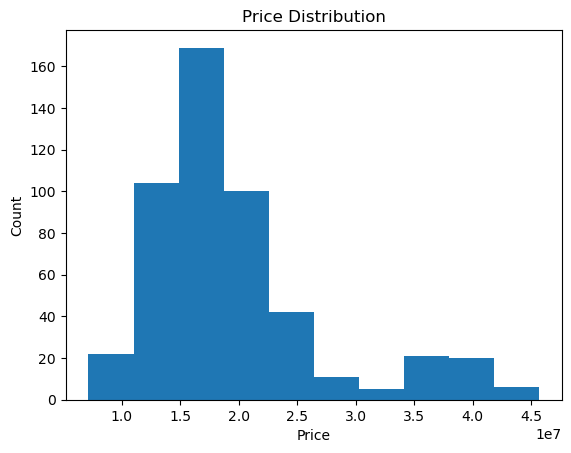

In [52]:
plt.figure()
plt.hist(df["price_kes"])
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [53]:
df[['size_sqft','price_kes']].corr()

,size_sqft,price_kes
size_sqft,1.000000,0.377953
price_kes,0.377953,1.000000


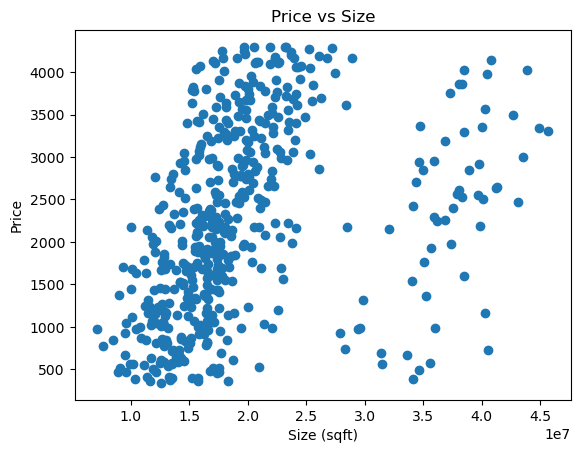

In [54]:
plt.figure()
plt.scatter(df["price_kes"], df["size_sqft"])
plt.xlabel("Size (sqft)")
plt.ylabel("Price")
plt.title("Price vs Size")
plt.show()

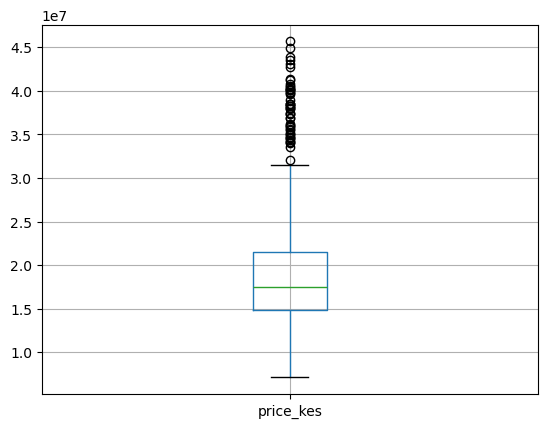

In [55]:
df.boxplot(column="price_kes")
plt.show()

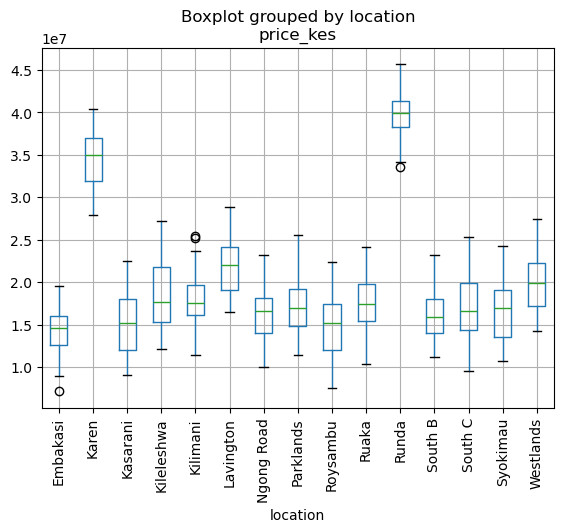

In [56]:
df.boxplot(column="price_kes", by="location")
plt.xticks(rotation=90)
plt.show()

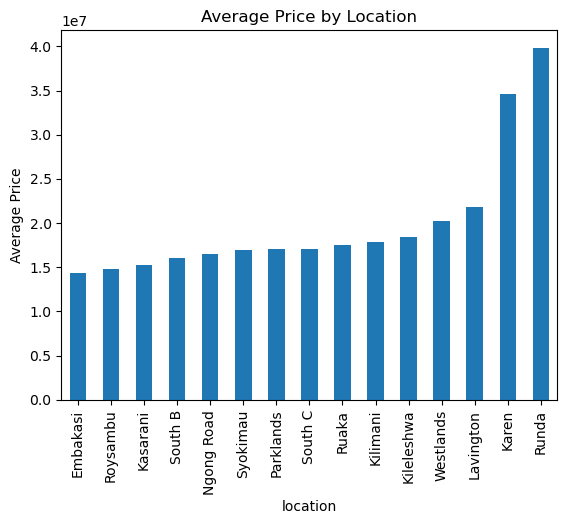

In [57]:
avg_price = df.groupby("location")["price_kes"].mean().sort_values()

plt.figure()
avg_price.plot(kind="bar")
plt.title("Average Price by Location")
plt.ylabel("Average Price")
plt.show()

In [58]:
df.groupby('location')['price_kes'].median().sort_values(ascending=False)

location
Runda         39942117.5
Karen         34994405.0
Lavington     22006481.0
Westlands     19913380.0
Kileleshwa    17626818.5
Kilimani      17535173.0
Ruaka         17464101.0
Parklands     17012508.0
Syokimau      16973116.0
South C       16611371.0
Ngong Road    16575921.0
South B       15931199.5
Kasarani      15245420.0
Roysambu      15215867.0
Embakasi      14661900.5
Name: price_kes, dtype: float64

In [59]:
df.describe()

,bedrooms,bathrooms,size_sqm,price_kes,size_sqft,price_per_sqft,backup generator,balcony,cctv,elevator,garden,gym,parking,security,servant quarter,swimming pool
count,500.000000,500.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.018000,2.486000,206.81800,1.946748e+07,2226.168270,11782.849374,0.322000,0.338000,0.342000,0.342000,0.348000,0.350000,0.330000,0.342000,0.384000,0.338000
std,1.396272,1.377534,104.47384,7.502103e+06,1124.545968,9554.756713,0.467711,0.473502,0.474855,0.474855,0.476813,0.477447,0.470684,0.474855,0.486845,0.473502
min,1.000000,1.000000,31.60000,7.135516e+06,340.139240,3850.047051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,114.77500,1.482405e+07,1235.426622,6311.024856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,201.30000,1.749874e+07,2166.773070,8680.695230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3.000000,296.50000,2.150512e+07,3191.496350,13357.877462,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,6.000000,399.10000,4.568408e+07,4295.872490,89322.774129,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
# correlation for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

                  bedrooms  bathrooms  size_sqm  price_kes  size_sqft  \
bedrooms          1.000000   0.534106 -0.020443   0.214810  -0.020443   
bathrooms         0.534106   1.000000 -0.085814   0.110773  -0.085814   
size_sqm         -0.020443  -0.085814  1.000000   0.377953   1.000000   
price_kes         0.214810   0.110773  0.377953   1.000000   0.377953   
size_sqft        -0.020443  -0.085814  1.000000   0.377953   1.000000   
price_per_sqft    0.131202   0.144976 -0.630696   0.203537  -0.630696   
backup generator -0.008893   0.033450 -0.012767  -0.017092  -0.012767   
balcony          -0.024377   0.014950  0.006492   0.037815   0.006492   
cctv             -0.018371  -0.009516 -0.021708   0.008104  -0.021708   
elevator          0.045102   0.014993 -0.073765  -0.043858  -0.073765   
garden           -0.105751  -0.099354  0.056883  -0.050221   0.056883   
gym               0.020592  -0.021481 -0.001472   0.019561  -0.001472   
parking           0.021437  -0.000587  0.051289   0